## Stock Price Prediction and Forecasting Using Stacked LSTM - Deep Learning

In [4]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import yfinance as yf
%matplotlib inline
from keras.preprocessing.sequence import TimeseriesGenerator
import plotly.graph_objects as go
import matplotlib.pyplot as plt
plt.style.use('bmh')




In [5]:
# Historical Carnival Cruise Stock Price:
# OHLCV using yfinance
# Load the stocks data
ccl = yf.download("CCL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
ccl.dropna(inplace=True)
#ccl.head()

[*********************100%***********************]  1 of 1 completed


In [6]:
# Historical Delta Airlines Stock Price:
# OHLCV using yfinance
# Load the stocks data
dal = yf.download("DAL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
dal.dropna(inplace=True)
#dal.head()

[*********************100%***********************]  1 of 1 completed


In [7]:
# Historical ETSY Stock Price:
# OHLCV using yfinance
# Load the stocks data
etsy = yf.download("ETSY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
etsy.dropna(inplace=True)
#etsy.head()

[*********************100%***********************]  1 of 1 completed


In [8]:
# Historical L Brands Stock Price:
# OHLCV using yfinance
# Load the stocks data
LB = yf.download("LB", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
LB.dropna(inplace=True)
#LB.head()

[*********************100%***********************]  1 of 1 completed


In [9]:
# Historical SPY Stock Price:
# OHLCV using yfinance
# Load the stocks data
spy = yf.download("SPY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
spy.dropna(inplace=True)
spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,182.513626,222353500
2016-01-05,201.399994,201.899994,200.050003,201.360001,182.822327,110845800
2016-01-06,198.339996,200.059998,197.600006,198.820007,180.516174,152112600
2016-01-07,195.330002,197.440002,193.589996,194.050003,176.185333,213436100
2016-01-08,195.190002,195.850006,191.580002,191.919998,174.251419,209817200


In [10]:
precovid_spy = spy['2016-01-01' :'2020-02-20']
precovid_spy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,335.859985,338.119995,335.559998,337.059998,330.880859,54501900
2020-02-14,337.510010,337.730011,336.200012,337.600006,331.410980,64582200
2020-02-18,336.510010,337.670013,335.209991,336.730011,330.556915,57226200
2020-02-19,337.790009,339.079987,337.480011,338.339996,332.137360,48814700
2020-02-20,337.739990,338.640015,333.679993,336.950012,330.772919,74163400


In [11]:
ccl_df = ccl[['Close']].copy()
dal_df = dal[['Close']].copy()
etsy_df = etsy[['Close']].copy()
LB_df = LB[['Close']].copy()
spy_df = spy[['Close']].copy()

In [12]:
ccl_df.rename(columns = {'Close':'CCL'}, inplace = True) 
dal_df.rename(columns = {'Close':'DAL'}, inplace = True) 
etsy_df.rename(columns = {'Close':'ETSY'}, inplace = True) 
LB_df.rename(columns = {'Close':'LB'}, inplace = True) 
spy_df.rename(columns = {'Close':'SPY'}, inplace = True) 
#spy_df.head()

In [13]:
dfs = [ccl_df, dal_df, etsy_df, LB_df,spy_df ]
df = pd.concat(dfs,axis=1,join="outer",ignore_index=False)
df.tail()

,CCL,DAL,ETSY,LB,SPY
Date,,,,,
2021-01-13,20.100000,40.450001,207.029999,46.160000,379.790009
2021-01-14,20.920000,41.470001,211.520004,44.980000,378.459991
2021-01-15,20.790001,39.980000,204.419998,45.200001,375.700012
2021-01-19,20.870001,40.310001,221.309998,45.730000,378.649994
2021-01-20,20.780001,41.619999,215.690002,45.560001,383.890015


In [14]:
precovid_df = df['2016-01-01' :'2020-02-20']
precovid_df.tail()

,CCL,DAL,ETSY,LB,SPY
Date,,,,,
2020-02-13,43.200001,59.130001,52.970001,24.280001,337.059998
2020-02-14,42.599998,58.900002,53.160000,24.340000,337.600006
2020-02-18,42.919998,58.720001,53.320000,24.090000,336.730011
2020-02-19,43.340000,58.509998,53.180000,24.600000,338.339996
2020-02-20,42.500000,58.380001,54.389999,23.420000,336.950012


In [15]:
covid_df = df['2020-02-21' :'2021-01-21']
covid_df.head()

,CCL,DAL,ETSY,LB,SPY
Date,,,,,
2020-02-21,41.689999,57.869999,53.700001,24.070000,333.480011
2020-02-24,37.759998,54.230000,51.330002,23.650000,322.420013
2020-02-25,35.840000,50.889999,49.889999,23.500000,312.649994
2020-02-26,33.139999,49.590000,50.689999,22.780001,311.500000
2020-02-27,31.850000,48.189999,57.919998,23.049999,297.510010


In [16]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers  import Dense, LSTM
import matplotlib. pyplot as plt


In [17]:
#precovid_spy  = precovid_spy[['Close']].copy()
precovid_spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,182.513626,222353500
2016-01-05,201.399994,201.899994,200.050003,201.360001,182.822327,110845800
2016-01-06,198.339996,200.059998,197.600006,198.820007,180.516174,152112600
2016-01-07,195.330002,197.440002,193.589996,194.050003,176.185333,213436100
2016-01-08,195.190002,195.850006,191.580002,191.919998,174.251419,209817200


Text(0, 0.5, 'SPY Close price in $')

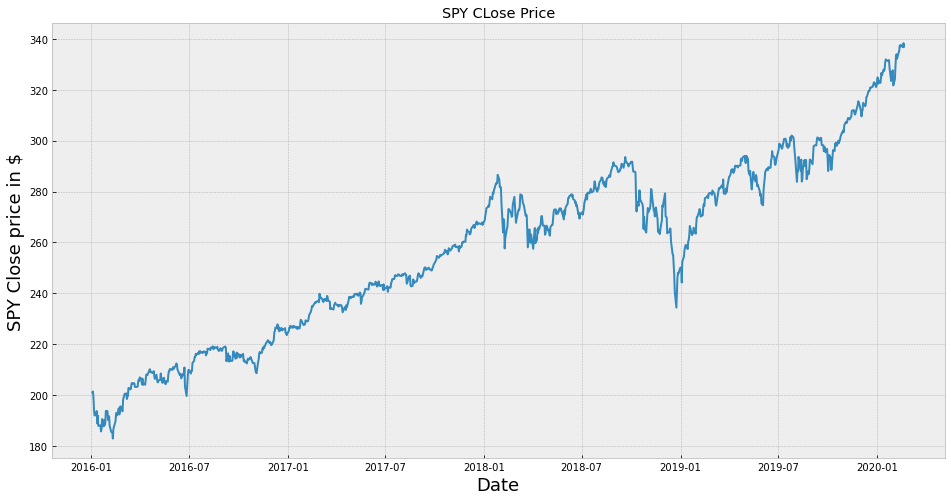

In [18]:
plt.figure(figsize=(16,8))
plt.title("SPY CLose Price")
plt.plot(precovid_spy["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("SPY Close price in $", fontsize=18)

In [19]:
data = precovid_spy.filter(['Close'])
dataset = data.values
len(dataset)

1040

In [20]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.11679962],
       [0.11898637],
       [0.1026499 ],
       ...,
       [0.98964506],
       [1.        ],
       [0.99106005]])

In [22]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

In [37]:
y_train = np.asarray(y_train)

In [38]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model


In [39]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 1s 106ms/step - loss: 0.0208
Epoch 2/10
11/11 [==============================] - 1s 113ms/step - loss: 0.0104
Epoch 3/10
11/11 [==============================] - 1s 112ms/step - loss: 0.0073
Epoch 4/10
11/11 [==============================] - 1s 80ms/step - loss: 0.0043
Epoch 5/10
11/11 [==============================] - 1s 90ms/step - loss: 0.0023
Epoch 6/10
11/11 [==============================] - 1s 80ms/step - loss: 0.0018
Epoch 7/10
11/11 [==============================] - 1s 81ms/step - loss: 0.0013
Epoch 8/10
11/11 [==============================] - 1s 90ms/step - loss: 7.2335e-04
Epoch 9/10
11/11 [==============================] - 1s 93ms/step - loss: 7.2572e-04
Epoch 10/10
11/11 [==============================] - 1s 85ms/step - loss: 7.2732e-04


In [43]:
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [44]:
x_test = np.array(x_test)

In [45]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [46]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [48]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.4954139024783404

<ipython-input-50-576221d91153>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

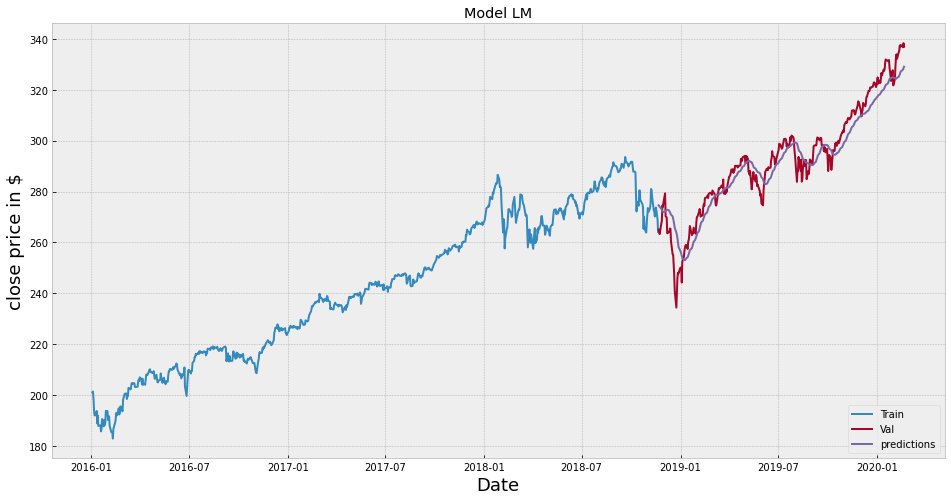

In [50]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model LM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [ ]:
valid